# Week 1 - measuring complexity

This week:

1. Try to launch this notebook with the Binder link at https://github.com/claresloggett/comp90014_workshops
2. Explore JupyterLab (your tutor will demo). 
3. Check that you are able to log into your account at https://comp90014.eng.unimelb.edu.au/
4. Try the empirical complexity exercises below

If you are very new to programming (or just want a Python primer), you may want to just read through the below and instead try the exercises at http://claresloggett.github.io/python_workshops/hammingdist.html and http://claresloggett.github.io/python_workshops/kmer_counting.html .

## Exploring JupyterLab 

You can find a User Guide with a description of features at http://jupyterlab.readthedocs.io

The main interface we'll be using is the Jupyter Notebook interface. If you prefer to run just Jupyter Notebook itself instead of Jupyter Lab, that is fine. 

Some useful hotkeys are:

* Shift-Enter : execute the code in the current cell
* Enter : edit the current cell
* ESC : stop editing a cell and return to "command mode" to use other hotkeys
* m : Turn the current cell into a Markdown cell
* y : Turn the current cell into a code cell
* a : add a new cell above
* b : add a new cell below
* dd : delete the current cell
* c : copy the current cell
* v : paste the copied cell(s)

You can also execute the command `?` or `help()` to get help on any function. For instance, `sorted?` or `help(sorted)`.

## Imports 

In [1]:
# Get matplotlib plots to appear inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from sort_utilities import time_sort, completely_sorted_list, nearly_sorted_list, random_list, reversed_list

## Measuring complexity 

### Insertion sort 

Here is an implementation of insertion sort, discussed in lectures.

This implementation sorts the list in-place, so the original list will also be modified.

In [4]:
def isort(items):
    """
    Sort a list in-place using insertion sort
    """
    for index in range(1, len(items)):
        next_item = items[index]
        while index >= 1 and (next_item < items[index - 1]):
            items[index] = items[index - 1]
            index -= 1
        items[index] = next_item
    return items

We've imported some functions that create lists with different properties (you can see these in `sort_utilities.py`). Execute the following code cells:

In [ ]:
random_list(10)

In [ ]:
nearly_sorted_list(10)

In [ ]:
reversed_list(10)

In [ ]:
completely_sorted_list(10)

Let's test the performance of insertion sort using Jupyter's `%timeit` magic. We'll make the list outside the timed cell, as we don't want to time the creation.

In [5]:
items = random_list(10)

In [6]:
%timeit isort(items)

3.13 µs ± 330 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


On a bigger list:

In [7]:
items = random_list(1000)

In [8]:
%timeit isort(items)

269 µs ± 14.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


We've also imported a `time_sort()` function that you can use to time a sort function once you've written it, and get the result. 

In [5]:
# Test insertion sort on reverse-sorted lists of different size,
# and plot the results

N_values = list(range(10,5000,200))
time_values = []

for N in N_values:
    input_list = reversed_list(N)
    time_taken = time_sort(isort, input_list)
    time_values.append(time_taken)

plt.plot(N_values, time_values)

NameError: name 'sort_function' is not defined

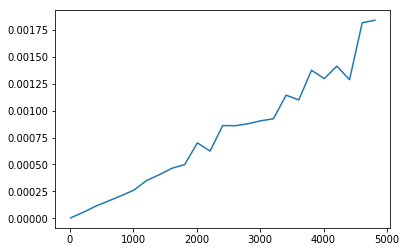

In [10]:
# Test insertion sort on nearly-sorted lists of different size,
# and plot the results

N_values = list(range(10,5000,200))
time_values = []

for N in N_values:
    input_list = nearly_sorted_list(N)
    time_taken = time_sort(isort, input_list)
    time_values.append(time_taken)

plt.plot(N_values, time_values)

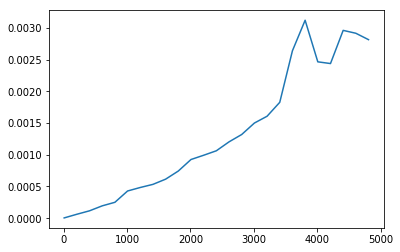

In [15]:
# Test insertion sort on randomly-sorted lists of different size,
# and plot the results

N_values = list(range(10,5000,200))
time_values = []

for N in N_values:
    input_list = random_list(N)
    time_taken = time_sort(isort, input_list)
    time_values.append(time_taken)

plt.plot(N_values, time_values)

Notice that above we can get extra randomness in our timings due to the randomness in the input lists - some inputs were harder to sort than others. How could you improve this test?

### Selection sort 

The selection sort algorithm similar to the insertion sort algorithm discussed in lectures, but even simpler to implement. Here is a version of the algorithm in words:

1. Initialise the sorted list as an empty list
2. Search the original list for the smallest element
3. Remove this element from the original list and insert it at the end of the sorted list 
4. Repeat from step 2 until the unsorted list is empty

Since we built the sorted list from the smallest to the largest element, we can just add each new element on to the end.

**Challenge:** 

Think theoretically: what do you expect the upper-bound (big-O) asymptotic complexity of selection sort to be?

**Challenge:** 

1. Implement selection sort below. 
2. Draw plots similar to the insertion sort plots above to test the behaviour of selection sort with random, inverted, and nearly-sorted lists

In [4]:
def selection_sort(unsorted):
    # Replace the code below so that we sort the list instead
    # of just returning the original list
    sorted_list = unsorted
    return sorted_list

In [6]:
x = [5,3,7,22,4,3]
print(selection_sort(x))
assert selection_sort(x) == sorted(x)

[5, 3, 7, 22, 4, 3]


AssertionError: 

## Merge sort

Here is the merge sort code given in lectures:

In [10]:
def msort(items):
    len_list = len(items)
    if len_list <= 1:
        return items
    else:
        mid_point = len_list//2
        top = items[:mid_point]
        bottom = items[mid_point:]
        return merge(msort(top), msort(bottom))

This function won't work yet because it depends on a `merge()` function, which we haven't defined.

**Challenge:** Write a merge function to merge two lists. Assume both lists are already sorted, and ensure that the resulting list is sorted.

In [13]:
def merge(list1, list2):
    # Replace the code below so that we merge the lists properly
    # instead of just appending one after the other
    merged = list1 + list2
    return merged

In [14]:
x1 = [4,6,9]
x2 = [2,6,20,21]
print(merge(x1,x2))
assert merge(x1,x2) == [2,4,6,6,9,20,21]

[4, 6, 9, 2, 6, 20, 21]


AssertionError: 

Once you have `merge()` working, `msort()` should work correctly:

In [ ]:
x = [5,3,7,22,4,3]
print(msort(x))
assert msort(x) == sorted(x)

**Exercise:** Draw plots similar to the insertion sort plots above to test the behaviour of merge sort with random, inverted, and nearly-sorted lists.